In [11]:
#Bibliotecas de manipulacao e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#Classes do modelo de aprendizado
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

#Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [12]:
#carregando o csv
dataset = pd.read_csv("https://raw.githubusercontent.com/cynthiamaia/Monitoria-DeepLearning-CIN-AI/main/Datasets/Iris.csv")

In [6]:
#Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['Species'] = pd.factorize(dataset['Species'])[0]

In [7]:
#Vamos usar somente duas features SepalLengthCm e SepalWidthCm
X = dataset.iloc[:,[2,3]]
y = dataset.iloc[:,[4]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Distribuição dos dados

##### Saber como as nossas variáveis se comportam é essencial para o classificador bayesiano, já que o classificador utiliza a distribuição de probabilidade para fazer a classificação, precisamos entender o comportamento da distribuição para saber qual família de classificadores bayesianos iremos aplicar.


##### GaussianNB - Implementa o algoritmo Gaussian Naive Bayes para classificação. A probabilidade das features é assumida como gaussiana.

##### MultinomialNB - Implementa o algoritmo Naive Bayes para dados multinomialmente distribuídos e é uma das duas variantes clássicas Naive Bayes usadas na classificação de texto.

##### BernoulliNB - Implementa o algoritmo Naive Bayes para dados que são distribuídos de acordo com distribuições multivariadas de Bernoulli; ou seja, pode haver várias features, mas cada um é assumido como uma variável de valor binário.

##### Mais detalhes https://scikit-learn.org/stable/modules/naive_bayes.html#.

##### Como selecionar:

##### Features contínuas: GaussianNB
##### Distribuições com features discretas, ou uma contagem (0, 1, 2, 3, ...): MultinomialNB 
##### Para features como distribuições de Bernoulli: BernoulliNB

In [ ]:
"""O gráfico de estimativa de densidade de kernel (kernel density estimate - KDE) é um método para visualizar a distribuição de observações em 
um conjunto de dados, análogo a um histograma. O KDE representa os dados usando uma curva de densidade de probabilidade contínua em uma ou mais dimensões."""

Text(0.5, 1.0, 'PetalWidthCm')

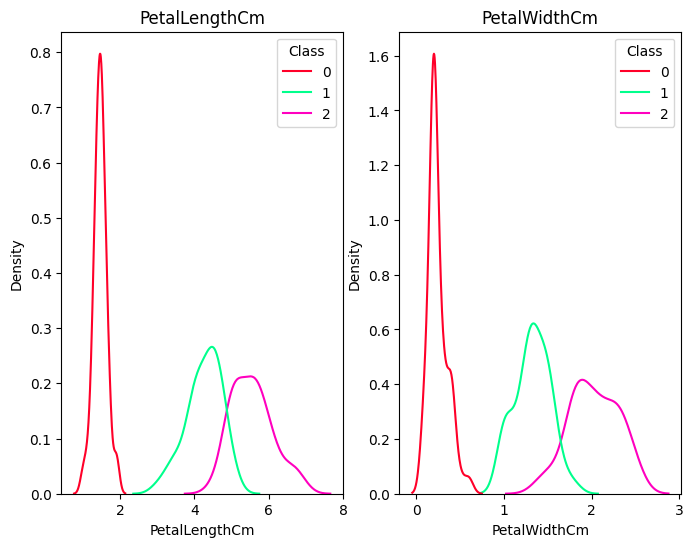

In [8]:
plot_data = X
plot_data["Class"] = y

fig, ax = plt.subplots(1,2, figsize=(8,6))

sns.kdeplot(data=plot_data, x="PetalLengthCm", hue="Class", palette='gist_rainbow', ax=ax[0])
ax[0].set_title("PetalLengthCm")

sns.kdeplot(data=plot_data, x="PetalWidthCm", hue="Class", palette='gist_rainbow', ax=ax[1])
ax[1].set_title("PetalWidthCm")


In [15]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y.values.flatten(), model)
    """Exemplo -> cria uma lista com esses dois arrays
        [
    [5.1, 4.9, 4.7, ...],  # valores da primeira feature
    [3.5, 3.0, 3.2, ...]   # valores da segunda feature
    ]
    Tranforma em uma matriz 2D
        [
    [5.1, 3.5],
    [4.9, 3.0],
    [4.7, 3.2],
    ...
    ]
    """
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__)
    plt.show()



GaussianNB
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.87      1.00      0.93        13
           2       1.00      0.82      0.90        11

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



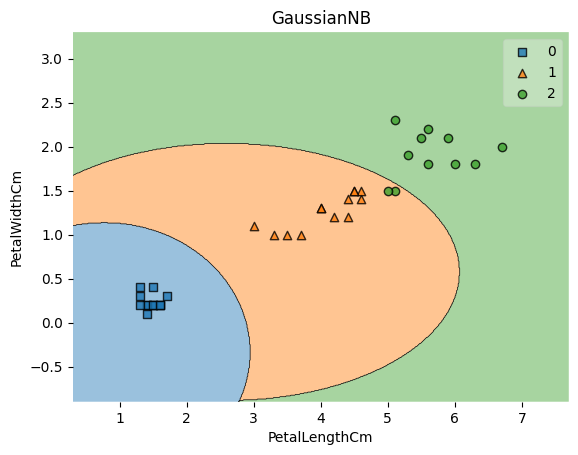

BernoulliNB
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00        13
           2       0.29      1.00      0.45        11

    accuracy                           0.29        38
   macro avg       0.10      0.33      0.15        38
weighted avg       0.08      0.29      0.13        38



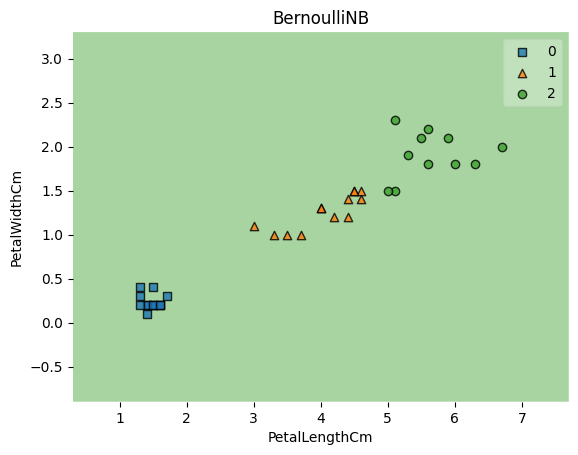

MultinomialNB
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.00      0.00      0.00        13
           2       0.41      1.00      0.58        11

    accuracy                           0.58        38
   macro avg       0.47      0.60      0.49        38
weighted avg       0.49      0.58      0.49        38



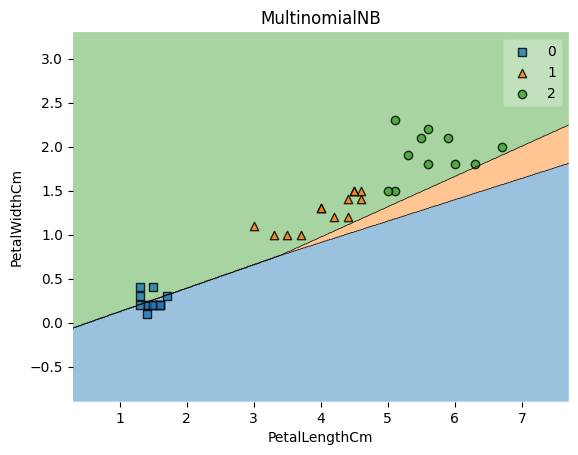

In [18]:
# Comportamento de diferentes modelos 

names = ["GaussianNB", "BernoulliNB", "MultinomialNB"]

classifiers = [GaussianNB(), BernoulliNB(), MultinomialNB()]

count = 0

for nome, clf in zip(names, classifiers):
  model = clf
  #treinando o modelo
  model.fit(X_train, y_train)

  #predição
  y_pred = model.predict(X_test)
  proba = model.predict_proba(X_test)

  #Resultados do classificador
  print(nome)
  print(classification_report(y_test, y_pred))
  show_decision_region(X_test, y_test, model)